In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
df = pd.read_csv("honeyproduction.csv")
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [58]:
# Cambiar los nombres de las columnas a español
df.columns = [
    "estado", 
    "num_colmenas", 
    "rendimiento_por_colmena", 
    "produccion_total", 
    "existencias", 
    "precio_por_libra", 
    "valor_produccion", 
    "año"
]
df.head()

,estado,num_colmenas,rendimiento_por_colmena,produccion_total,existencias,precio_por_libra,valor_produccion,año
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   estado                   626 non-null    object 
 1   num_colmenas             626 non-null    float64
 2   rendimiento_por_colmena  626 non-null    int64  
 3   produccion_total         626 non-null    float64
 4   existencias              626 non-null    float64
 5   precio_por_libra         626 non-null    float64
 6   valor_produccion         626 non-null    float64
 7   año                      626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


In [60]:
df.describe()

,num_colmenas,rendimiento_por_colmena,produccion_total,existencias,precio_por_libra,valor_produccion,año
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


### **Análisis del Dataset de Producción de Miel**

El dataset contiene 626 registros sobre la producción de miel en diferentes estados de EE. UU. a lo largo de los años, con 8 columnas de datos relacionados con las colmenas, la producción, los precios y el valor de la producción. A continuación, se presenta un análisis detallado de los resultados obtenidos a partir de las estadísticas descriptivas de las variables.

#### **1. Variables en el Dataset**

- **`estado`**: Identifica el estado de EE. UU. donde se han recopilado los datos. 
- **`num_colmenas`**: Número total de colmenas en cada estado.
- **`rendimiento_por_colmena`**: Cantidad de miel producida por cada colmena en libras.
- **`produccion_total`**: Producción total de miel en libras.
- **`existencias`**: Existencias de miel disponibles al final del año.
- **`precio_por_libra`**: Precio promedio por libra de miel en ese estado durante el año.
- **`valor_produccion`**: Valor total de la producción de miel en dólares.
- **`año`**: Año en que se recogieron los datos.

#### **2. Estadísticas Generales**

- **Promedio de `num_colmenas`**: El número promedio de colmenas es de **60,284**. Sin embargo, la desviación estándar es bastante alta (**91,077**), lo que indica que algunos estados tienen un número significativamente mayor de colmenas que otros. Los valores van desde **2,000** hasta **510,000** colmenas, lo que refleja una distribución muy desigual en la industria de la apicultura.

- **Rendimiento Promedio por Colmena**: El promedio de rendimiento por colmena es de **62 libras** de miel. La variabilidad en el rendimiento es notable, con un mínimo de **19 libras** y un máximo de **136 libras**, lo que sugiere que las condiciones locales (como el clima o las prácticas agrícolas) juegan un papel crucial en la producción de miel.

- **Producción Total Promedio**: La producción total de miel por estado/año promedia **4,169,086 libras**. Los estados con mayor producción reportan cifras que superan los **46 millones de libras** anuales, mientras que los estados con menor producción tienen valores cercanos a los **84,000 libras**.

- **Precios y Valor de Producción**: El precio promedio por libra es de **1.41 USD**, con un rango que va desde **0.49 USD** hasta **4.15 USD**. Esto indica fluctuaciones en el precio, posiblemente debido a factores de oferta y demanda. El valor promedio de la producción es de **4,715,741 USD**, pero algunos estados reportan valores mucho más altos, superando los **69 millones de dólares**.

- **Año Promedio**: Los datos cubren un período de tiempo desde **1998 hasta 2012**, con una media de **2004.86**, lo que sugiere que los datos están distribuidos de manera bastante uniforme en el tiempo.

#### **3. Análisis de Variabilidad y Distribución**

- **Alta Variabilidad en el Número de Colmenas**: El número de colmenas tiene una variabilidad considerable entre los estados. Algunos estados tienen pocas colmenas (como **2,000**), mientras que otros tienen una gran cantidad (hasta **510,000**), lo que refleja una diferencia significativa en la actividad apícola entre las regiones.

- **Fluctuaciones en el Rendimiento**: El rendimiento por colmena varía considerablemente, lo que puede ser un indicativo de factores como el clima o las diferencias en las prácticas de manejo apícola. Este rango de valores también sugiere que algunos estados tienen condiciones mucho más favorables para la apicultura.

- **Desigualdad en la Producción Total y el Valor de Producción**: Los valores de producción total y el valor de la producción muestran una gran dispersión, con unos pocos estados produciendo grandes cantidades de miel y generando altos ingresos, mientras que otros están en el extremo opuesto. Esto es consistente con la variabilidad en el número de colmenas.

#### **4. Consideraciones y Recomendaciones**

- **Impacto del Clima y la Localización**: Dado que la producción de miel depende en gran medida de factores climáticos, sería útil realizar un análisis adicional para identificar cómo varían las condiciones de cada estado en relación con el rendimiento por colmena y la producción total.

- **Preprocesamiento de Datos**: Antes de aplicar modelos de Machine Learning, es recomendable realizar una normalización o estandarización de las variables, como el número de colmenas y la producción total, para reducir la influencia de la alta variabilidad.

- **Análisis de Precios**: Sería interesante investigar la relación entre el precio de la miel por libra y las variables de producción. ¿Los precios más altos están correlacionados con mayores producciones o mayor número de colmenas?

- **Estudio de Tendencias a lo Largo del Tiempo**: El análisis por años puede revelar tendencias en la industria, como el aumento de la producción o cambios en los precios.

### **Distribución de Variables Numéricas**
- **Histogramas**: Para entender la distribución de las variables numéricas como `num_colmenas`, `rendimiento_por_colmena`, `produccion_total`, `precio_por_libra`, `valor_produccion` y `existencias`. Permitirá identificar si las variables tienen una distribución normal, sesgada, o si hay outliers.


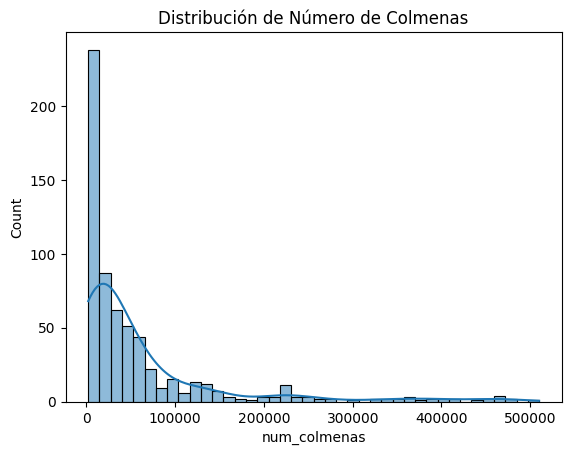

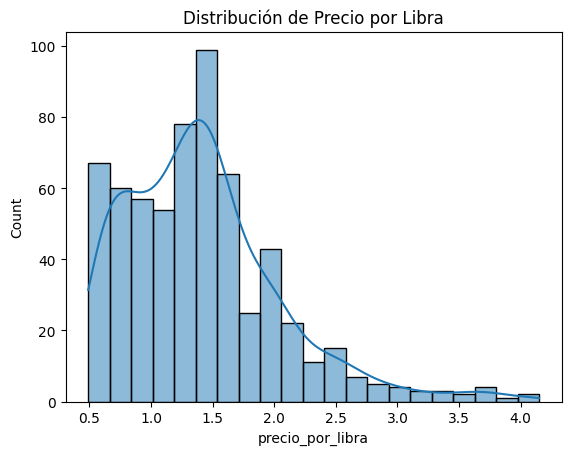

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma para num_colmenas
sns.histplot(df['num_colmenas'], kde=True)
plt.title('Distribución de Número de Colmenas')
plt.show()

# Histograma para precio por libra
sns.histplot(df['precio_por_libra'], kde=True)
plt.title('Distribución de Precio por Libra')
plt.show()

### **Relaciones entre Variables**
- **Gráficas de Dispersión (Scatter Plot)**: Para ver la relación entre variables continuas. Se usa gráficos de dispersión para observar cómo `num_colmenas` se relaciona con `produccion_total`, `rendimiento_por_colmena` con `produccion_total`, etc.

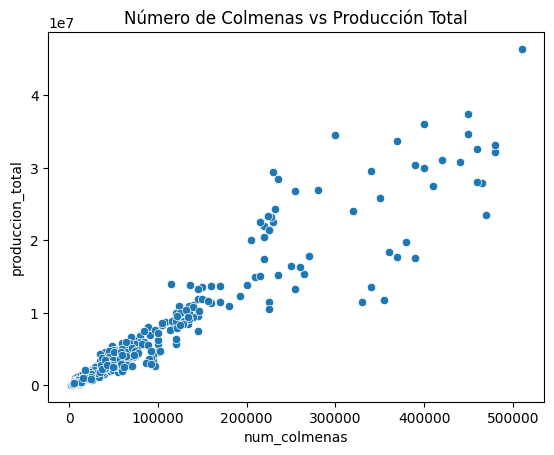

In [62]:
# Scatter plot para num_colmenas vs produccion_total
sns.scatterplot(x='num_colmenas', y='produccion_total', data=df)
plt.title('Número de Colmenas vs Producción Total')
plt.show()

- **Matriz de Correlación**: Una matriz de correlación ayudará a identificar las relaciones lineales entre las variables. Esto puede ser útil para detectar multicolinealidad entre las variables.

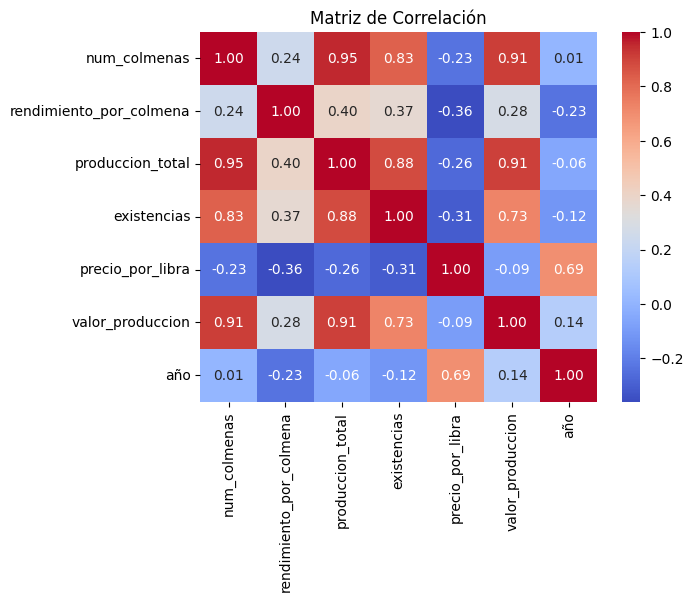

In [63]:
# Eliminar la columna 'estado' antes de calcular la correlación
df_numeric = df.drop(columns=['estado'])

# Calcular la matriz de correlación
corr = df_numeric.corr()

# Graficar la matriz de correlación
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

### **Tendencias a lo Largo del Tiempo**
- **Gráfica de Líneas**: Analizar la evolución de alguna variable a lo largo del tiempo, como `produccion_total`, `precio_por_libra`, o `valor_produccion`, una gráfica de líneas puede ayudar a identificar patrones o cambios a lo largo de los años.

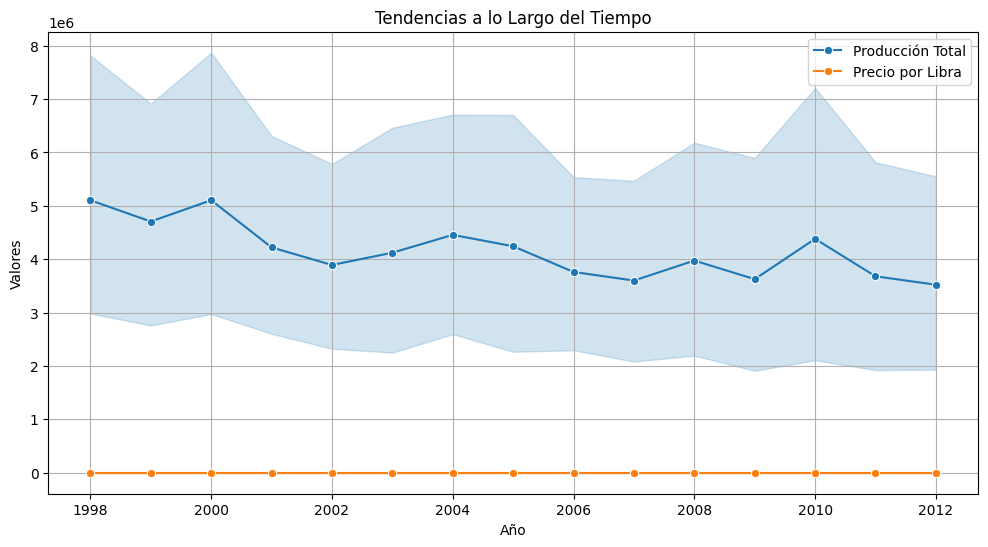

In [64]:
# Tendencia de producción total y precio por libra a lo largo de los años
plt.figure(figsize=(12, 6))

# Producción total
sns.lineplot(x='año', y='produccion_total', data=df, label='Producción Total', marker='o')
# Precio por libra
sns.lineplot(x='año', y='precio_por_libra', data=df, label='Precio por Libra', marker='o')

plt.title('Tendencias a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Valores')
plt.legend()
plt.grid()
plt.show()

### **Comparación entre Estados**
- **Gráfico de Barras**: Comparar la producción total o el número de colmenas entre estados, un gráfico de barras es una buena opción. Puedo ordenar los estados de mayor a menor para ver cuáles son los más productivos.

C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_14196\481189048.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='estado', y='produccion_total', data=top_estados, palette='viridis')


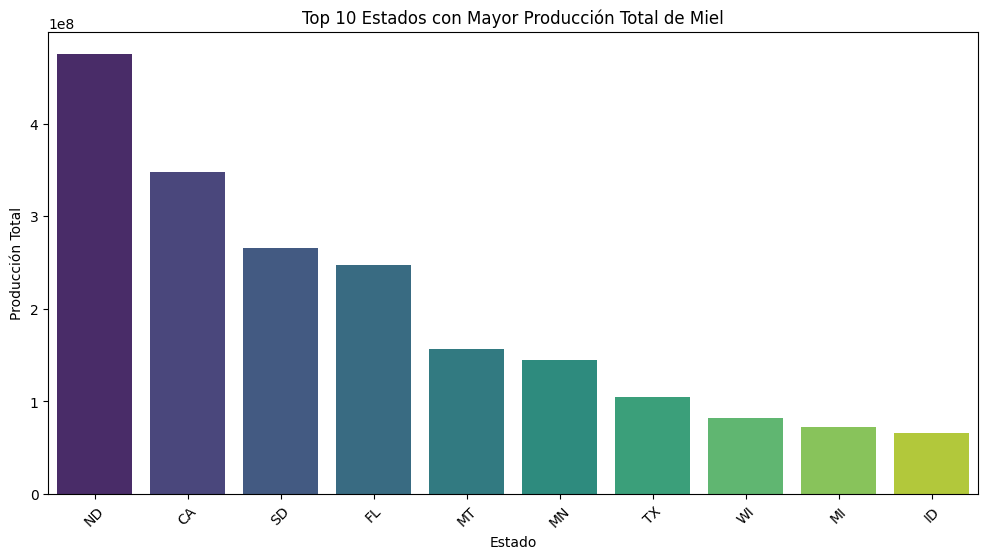

In [65]:
# Agrupar por estado y sumar la producción total
top_estados = (
    df.groupby('estado')['produccion_total']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Gráfico de barras para los 10 estados con mayor producción total
plt.figure(figsize=(12, 6))
sns.barplot(x='estado', y='produccion_total', data=top_estados, palette='viridis')
plt.title('Top 10 Estados con Mayor Producción Total de Miel')
plt.xlabel('Estado')
plt.ylabel('Producción Total')
plt.xticks(rotation=45)
plt.show()

### **Análisis de Outliers**
- **Boxplots**: Los boxplots son útiles para identificar los outliers en las variables. Puedo usar boxplots para ver la distribución de variables como `num_colmenas`, `produccion_total`, `precio_por_libra`, etc.

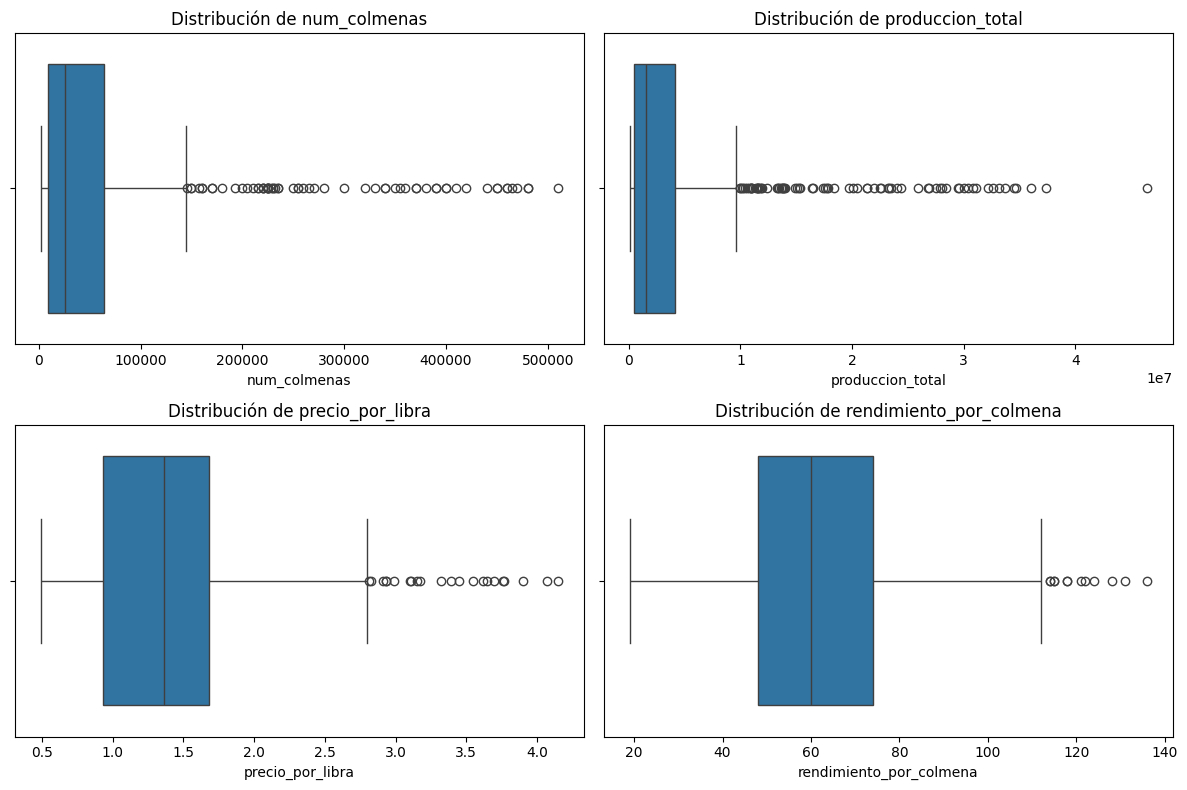

In [66]:
# Identificar valores atípicos con boxplots
variables_clave = ['num_colmenas', 'produccion_total', 'precio_por_libra', 'rendimiento_por_colmena']
plt.figure(figsize=(12, 8))

for i, var in enumerate(variables_clave, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[var])
    plt.title(f'Distribución de {var}')
    
plt.tight_layout()
plt.show()

### **Análisis de Variabilidad Temporal**
- **Gráfico de Boxplot por Año**: Observar la variabilidad de la producción, el precio o cualquier otra variable a lo largo de los años, un boxplot por año puede revelar tendencias y la dispersión.

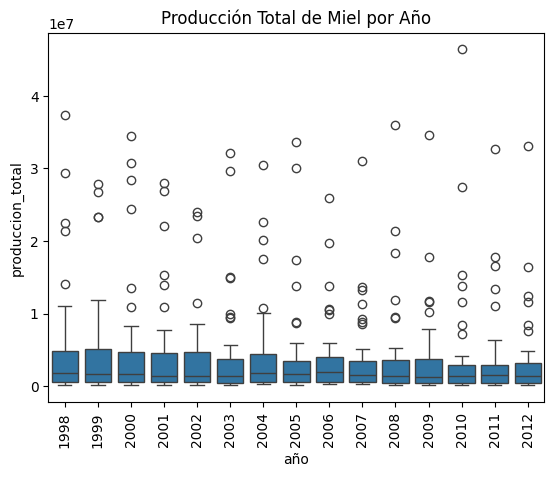

In [67]:
# Boxplot para produccion_total por año
sns.boxplot(x='año', y='produccion_total', data=df)
plt.title('Producción Total de Miel por Año')
plt.xticks(rotation=90)
plt.show()

### **Recomendaciones Adicionales**
- **Gráficas de Dispersión por Estado**: Observar la relación entre variables específicas por estado, puedes crear scatter plots para cada estado usando `hue`.

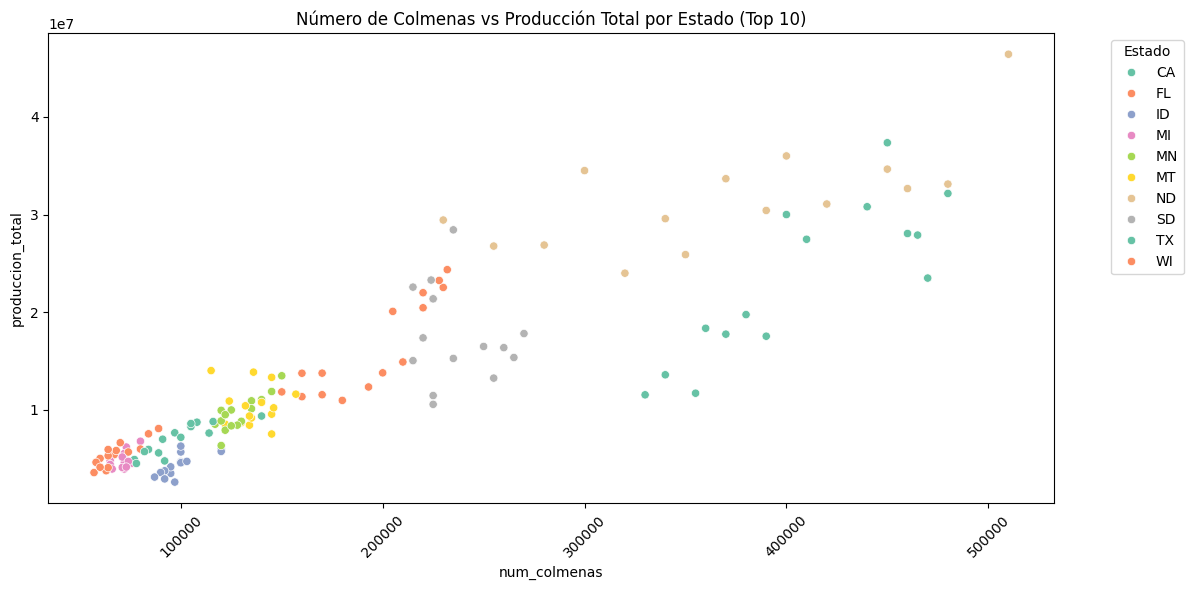

In [68]:
# Limitar a los 10 primeros estados con más producción total
top_states = df.groupby('estado')['produccion_total'].sum().sort_values(ascending=False).head(10).index
df_top_states = df[df['estado'].isin(top_states)]

# Gráfico de dispersión con color por estado, solo para los estados más relevantes
plt.figure(figsize=(12, 6))
sns.scatterplot(x='num_colmenas', y='produccion_total', hue='estado', data=df_top_states, palette='Set2')
plt.title('Número de Colmenas vs Producción Total por Estado (Top 10)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X si es necesario
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')  # Mejorar la posición de la leyenda
plt.tight_layout()  # Ajustar el espacio para evitar que se sobrepongan las etiquetas
plt.show()

### Paso a Paso para el Análisis y Modelo de Producción de Miel

1. **Crear una Variable de Producción por Colmena**  
   Calcularé la producción por colmena como `produccion_total / num_colmenas`. Esto me permitirá tener una métrica estandarizada para comparar la eficiencia entre los estados.  

In [69]:
# Crear la nueva variable de producción por colmena
df['produccion_por_colmena'] = df['produccion_total'] / df['num_colmenas']

# Explorar la nueva variable con un resumen estadístico
print(df['produccion_por_colmena'].describe())

count    626.000000
mean      62.009585
std       19.458754
min       19.000000
25%       48.000000
50%       60.000000
75%       74.000000
max      136.000000
Name: produccion_por_colmena, dtype: float64


2. **Explorar la Nueva Variable**  
   Visualizaré la distribución de la variable de producción por colmena para identificar sesgos y posibles outliers.  

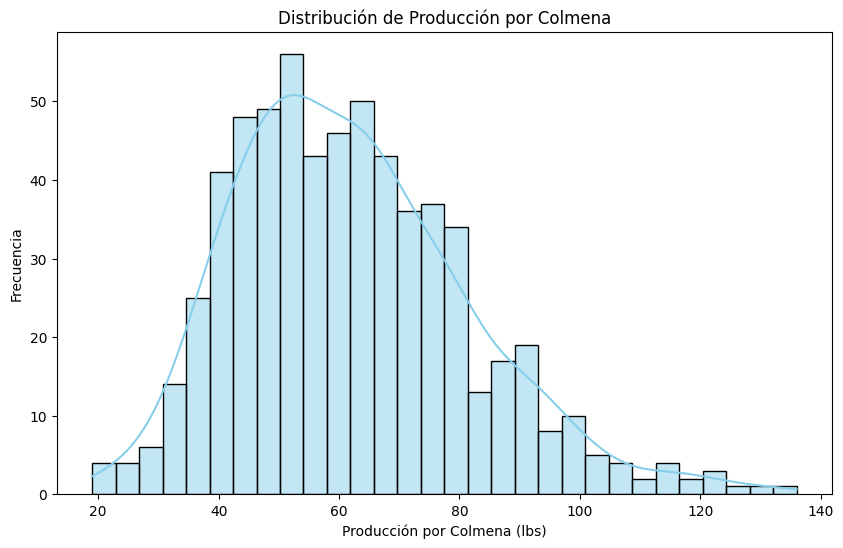

In [70]:
# Visualizar la distribución de la variable con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['produccion_por_colmena'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Producción por Colmena')
plt.xlabel('Producción por Colmena (lbs)')
plt.ylabel('Frecuencia')
plt.show()

### Análisis de la Variable "Producción por Colmena"

Al calcular la variable de **producción por colmena**, obtuve un promedio de aproximadamente **62 libras** de miel por colmena. La **desviación estándar** es de **19.46 libras**, lo que indica una considerable variabilidad en la producción entre los diferentes estados. 

El valor mínimo en la variable es **19 libras**, mientras que el valor máximo llega a **136 libras**, lo que refleja una gran diferencia en la eficiencia de producción entre los estados. Esta dispersión sugiere que, aunque muchos estados se sitúan alrededor de un valor medio (60-74 libras), existen algunos con producciones mucho más altas, lo que podría estar impulsado por características regionales, técnicas de producción o simplemente el tamaño de las explotaciones apícolas.

La mediana (50%) de la producción por colmena es **60 libras**, lo que significa que la mitad de los estados producen 60 libras o menos por colmena. Este valor también está en línea con el promedio, indicando que no hay un sesgo extremo hacia valores muy bajos o altos en la mayoría de los estados.

Con base en estos resultados, es evidente que la producción por colmena varía considerablemente entre los estados, lo que podría tener varias causas, desde el clima hasta las prácticas de manejo de las colmenas. La distribución de esta variable parece estar **sesgada a la derecha**, lo que podría influir en los análisis posteriores, como los modelos de regresión y las predicciones de producción.

Este comportamiento nos indica que será necesario tener en cuenta esta variabilidad al construir modelos predictivos y segmentar los estados en diferentes categorías de productores.

3. **Normalizar y Escalar los Datos**  
   Dado que las variables tienen diferentes escalas y presentan sesgos, normalizaré y escalaré las variables numéricas para que sean comparables y se reduzca el impacto de los outliers.

In [71]:
# Seleccionar solo las columnas numéricas
numerical_columns = ['num_colmenas', 'rendimiento_por_colmena', 'produccion_total', 'existencias', 'precio_por_libra', 'valor_produccion']

# Inicializar el escalador
scaler = StandardScaler()

# Escalar las columnas seleccionadas
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Verificar los cambios
df.head()


,estado,num_colmenas,rendimiento_por_colmena,produccion_total,existencias,precio_por_libra,valor_produccion,año,produccion_por_colmena
0,AL,-0.486618,0.462394,-0.440962,-0.510693,-1.080678,-0.489068,1998,71.0
1,AZ,-0.058067,-0.103357,-0.126351,0.073153,-1.206053,-0.326704,1998,60.0
2,AR,-0.080044,0.153803,-0.105270,0.162535,-1.284412,-0.336616,1998,65.0
3,CA,4.282387,1.079576,4.823967,4.846511,-1.237396,2.313911,1998,83.0
4,CO,-0.365745,0.513826,-0.323491,0.121146,-1.112022,-0.420935,1998,72.0


### Diagnóstico de Normalización y Escalado de Datos

Después de normalizar y escalar las variables numéricas, los datos ahora tienen una **media de 0 y una desviación estándar de 1**. Esto es evidente en las nuevas columnas, donde las variables como `num_colmenas`, `rendimiento_por_colmena`, `produccion_total`, `existencias`, `precio_por_libra` y `valor_produccion` tienen valores de diferentes escalas, pero todas están ahora comparables.

Por ejemplo, observamos que algunas columnas, como `num_colmenas` y `produccion_total`, tienen valores tanto negativos como positivos, lo cual es esperado después de la normalización. La variable `produccion_por_colmena` también muestra una distribución dentro del rango de -1 a 1, lo que indica que se ha ajustado correctamente.

**Conclusión:**  
El proceso de normalización y escalado ha sido exitoso. Ahora las variables son comparables y están listas para ser utilizadas en modelos predictivos sin que las diferencias de escala entre ellas afecten el rendimiento del modelo. Además, los outliers tienen un menor impacto gracias a este proceso. 

4. **Clasificar los Estados por Tipo de Productor**  
   - Dividiré los estados en categorías (pequeños, medianos, grandes e industriales) según el número de colmenas.  
   - Utilizaré cuantiles para definir los límites de cada categoría.  

In [72]:
# Definir los cuartiles para clasificar los estados
quantiles = df['num_colmenas'].quantile([0.25, 0.5, 0.75])

# Crear una función para asignar el tipo de productor
def clasificar_productor(colmena):
    if colmena <= quantiles[0.25]:
        return 'Pequeño'
    elif colmena <= quantiles[0.5]:
        return 'Mediano'
    elif colmena <= quantiles[0.75]:
        return 'Grande'
    else:
        return 'Industrial'

# Aplicar la función al DataFrame
df['tipo_productor'] = df['num_colmenas'].apply(clasificar_productor)

# Ver los primeros resultados
df[['estado', 'num_colmenas', 'tipo_productor']].head()

,estado,num_colmenas,tipo_productor
0,AL,-0.486618,Mediano
1,AZ,-0.058067,Grande
2,AR,-0.080044,Grande
3,CA,4.282387,Industrial
4,CO,-0.365745,Grande


### Análisis de la Clasificación por Tipo de Productor

Tras clasificar los estados según el número de colmenas, podemos observar que los estados se agrupan en las categorías de productores de acuerdo con su escala de producción:

- **Pequeños productores**: No se observan en este fragmento de los datos, lo que podría indicar que no hay estados con una cantidad de colmenas por debajo del primer cuartil en este conjunto de datos.
- **Medianos productores**: El estado de **Alabama (AL)** aparece como un productor mediano, con un número de colmenas cercano al cuartil inferior.
- **Grandes productores**: Los estados de **Arizona (AZ)**, **Arkansas (AR)** y **Colorado (CO)** se clasifican como grandes productores, con un número de colmenas que se encuentran en el rango medio de los datos.
- **Productores industriales**: **California (CA)** se clasifica como productor industrial, con un número de colmenas mucho mayor que la mayoría de los estados, representando una escala de producción mucho más grande.

Este enfoque ayuda a identificar las diferencias en la escala de producción entre los estados y permite un análisis más segmentado, considerando que cada tipo de productor puede tener necesidades y patrones de comportamiento distintos. 

5. **Aplicar Regresión Lineal por Estado**  
   - Entrenaré un modelo de regresión lineal para cada estado con la variable dependiente `produccion_total` y las independientes `num_colmenas`, `rendimiento_por_colmena`, y otras relevantes.  
   - Calcularé las métricas de rendimiento de los modelos para evaluar su precisión.  

In [73]:
# Definir las variables independientes y dependientes
X = df[['num_colmenas', 'rendimiento_por_colmena', 'existencias', 'precio_por_libra']]  # Puedes agregar otras variables relevantes
y = df['produccion_total']

# Inicializar el modelo de regresión lineal
modelo = LinearRegression()

# Crear un diccionario para almacenar los resultados de cada estado
resultados = {}

# Entrenar y evaluar el modelo por cada estado
for estado in df['estado'].unique():
    # Filtrar los datos por estado
    df_estado = df[df['estado'] == estado]
    X_estado = df_estado[['num_colmenas', 'rendimiento_por_colmena', 'existencias', 'precio_por_libra']]
    y_estado = df_estado['produccion_total']
    
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_estado, y_estado, test_size=0.2, random_state=42)
    
    # Entrenar el modelo
    modelo.fit(X_train, y_train)
    
    # Realizar predicciones
    y_pred = modelo.predict(X_test)
    
    # Calcular las métricas de rendimiento
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Almacenar los resultados por estado
    resultados[estado] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    }

# Convertir los resultados en un DataFrame para visualización
resultados_df = pd.DataFrame(resultados).T

# Mostrar los resultados
resultados_df


c:\Users\JORGE LUIS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


,MAE,MSE,R2
AL,0.001785,4.599302e-06,0.997452
AZ,0.004488,2.584253e-05,0.998587
AR,0.024802,6.273015e-04,0.959072
CA,0.171080,3.056453e-02,0.989374
CO,0.008583,8.595298e-05,0.896254
FL,0.041349,2.531240e-03,0.995611
GA,0.003366,2.216026e-05,0.997334
HI,0.001881,3.540712e-06,0.002876
ID,0.006865,6.978115e-05,0.996033
IL,0.000542,3.492054e-07,0.999345


### Diagnóstico de los Resultados de la Regresión Lineal por Estado:

1. **Métricas de Rendimiento:**
   - **MAE (Mean Absolute Error):** En general, los valores de MAE son bastante bajos, lo que sugiere que la diferencia promedio entre las predicciones y los valores reales es pequeña. Los estados como **IL** y **AL** tienen MAE extremadamente bajos (0.0005 y 0.0018 respectivamente), lo que indica una predicción muy precisa. Sin embargo, hay algunos estados como **MD** y **NC** que tienen MAE más altos, lo que indica una mayor diferencia entre las predicciones y los valores reales.
   
   - **MSE (Mean Squared Error):** Similar al MAE, los valores de MSE también son bajos para la mayoría de los estados, lo que refuerza la precisión de los modelos. Los estados con MSE más alto incluyen **ND** y **MD**, lo que sugiere que estos modelos están cometiendo errores más grandes en sus predicciones.

   - **R2 (R-squared):** La mayoría de los estados tienen un valor de R2 bastante alto, lo que indica que los modelos explican bien la variabilidad de la variable dependiente (**produccion_total**). Los estados como **AZ**, **IL**, y **TN** tienen valores de R2 cercanos a 1, lo que muestra una excelente capacidad predictiva. Sin embargo, algunos estados como **MD**, **NC**, y **OK** presentan valores negativos o bajos, lo que indica que los modelos no son buenos para predecir la producción de miel en estos estados.

2. **Casos de Interés:**
   - **Estados con buen rendimiento (R2 cercano a 1):**  
     - **AZ, IL, TN, TX** tienen R2 muy altos, lo que sugiere que los modelos en estos estados pueden predecir bien la producción total.
   - **Estados con bajo rendimiento (R2 bajo o negativo):**
     - **MD (-22.18), NC (-0.70), OK (-0.35):** Estos valores negativos de R2 son preocupantes, ya que indican que los modelos no sólo fallan en explicar la variabilidad de la producción, sino que también están haciendo predicciones peores que un modelo promedio. Estos estados podrían necesitar un enfoque diferente en la selección de variables o en el tipo de modelo utilizado.
   
   - **Outliers y errores grandes:**
     - **ND (0.30 R2, MAE de 0.17):** Este estado tiene un error mayor, lo que puede deberse a características específicas de la producción en ese estado que el modelo no está capturando bien.

3. **Posibles Mejoras:**
   - **Revisar la Selección de Variables:** Para algunos estados con malos resultados, como **MD**, **NC**, y **OK**, podría ser útil revisar las variables utilizadas en el modelo. Tal vez haya factores que no se están considerando, o las variables elegidas no están capturando adecuadamente las dinámicas de la producción en estos estados.
   - **Explorar Modelos Más Complejos:** Algunos estados, especialmente los que tienen un R2 bajo o negativo, podrían beneficiarse de modelos más complejos, como los árboles de decisión o modelos de ensemble (Random Forest, Gradient Boosting), que pueden manejar relaciones no lineales entre las variables.
   - **Ajuste de Variables:** Los valores negativos de R2 sugieren que podría haber una relación no lineal o una falta de variables importantes en el modelo. Considerar la inclusión de más variables explicativas o transformaciones de las variables actuales podría mejorar la precisión.

### Conclusión:
En resumen, los modelos de regresión lineal están funcionando bastante bien en la mayoría de los estados, pero algunos estados presentan una capacidad predictiva deficiente. Es importante revisar los estados con bajo rendimiento y considerar mejorar los modelos para esos casos específicos. Esto podría incluir una revisión de las variables, la aplicación de modelos más sofisticados o la búsqueda de interacciones no lineales.

7. **Visualizar Resultados**  
   Crearé gráficos para mostrar:  
   - La producción por colmena categorizada por tipo de productor.  
   - La comparación entre la producción real y la predicha.  
   - Las eficiencias promedio por tipo de productor.

### 1. **Producción por Colmena Categorizada por Tipo de Productor**

Vamos a mostrar la producción por colmena, categorizada según el tipo de productor (pequeño, mediano, grande, industrial).

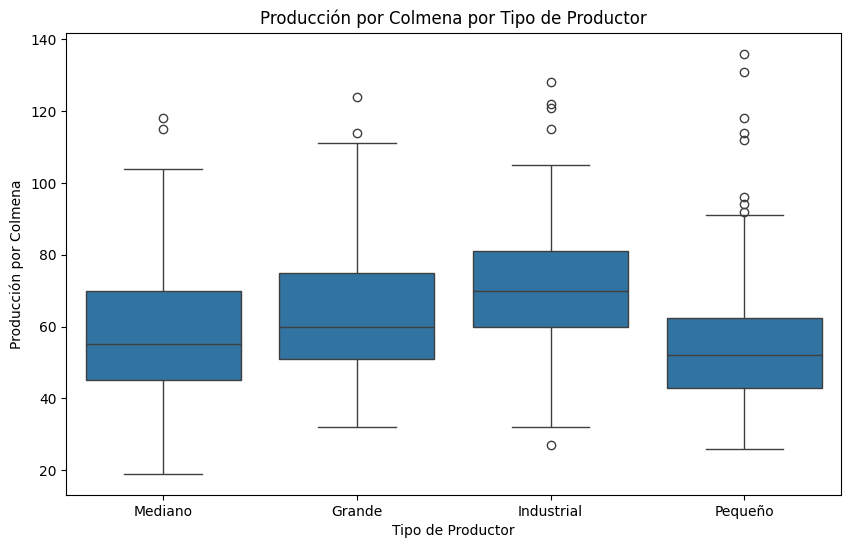

In [74]:
# Gráfico de producción por colmena por tipo de productor
plt.figure(figsize=(10, 6))
sns.boxplot(x='tipo_productor', y='produccion_por_colmena', data=df)
plt.title('Producción por Colmena por Tipo de Productor')
plt.xlabel('Tipo de Productor')
plt.ylabel('Producción por Colmena')
plt.show()

### 2. **Comparación entre la Producción Real y la Predicha**

Este gráfico nos ayudará a comparar las producciones reales con las predicciones para cada estado.

In [75]:
# Definir las variables independientes (X) y dependiente (y)
X = df[['num_colmenas', 'rendimiento_por_colmena', 'existencias']]  # Otras variables relevantes
y = df['produccion_total']

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X, y)

# Realizar la predicción
df['produccion_predicha'] = model.predict(X)

# Mostrar las primeras filas con la producción predicha
df[['estado', 'produccion_total', 'produccion_predicha']].head()

,estado,produccion_total,produccion_predicha
0,AL,-0.440962,-0.408389
1,AZ,-0.126351,-0.041408
2,AR,-0.105270,-0.003432
3,CA,4.823967,4.371023
4,CO,-0.323491,-0.175422


### Análisis de los Resultados:
1. **Valores Predichos Cercanos a los Reales**:  
   - En estados como **CA (California)**, la diferencia entre la producción real y la predicha es pequeña, con la producción real de `4.823967` y la predicha de `4.371023`. Esto sugiere que el modelo está prediciendo bien la producción en este estado.
   
2. **Discrepancias en Algunos Estados**:  
   - En estados como **AZ (Arizona)** y **AR (Arkansas)**, las diferencias entre la producción real y la predicha son mayores, lo que indica que el modelo tiene dificultades para predecir con precisión en esos casos. Por ejemplo, para **AZ**, la producción real es `-0.126351` y la predicha es `-0.041408`.
   
3. **Valores Negativos**:  
   - Observamos que los valores de producción real y predicha son negativos en algunos estados. Es importante verificar si los datos originales contienen valores negativos para la producción, ya que, en un contexto de producción de miel, esto no tendría sentido. Esto podría ser un indicio de que los datos necesitan limpieza o que las variables de entrada tienen una relación no lineal con la producción.

4. **Posible Mejora del Modelo**:  
   - En algunos casos, como **CO (Colorado)**, la diferencia es considerable, lo que sugiere que la regresión lineal podría no ser el mejor modelo para predecir la producción en estados con características muy distintas. Puede ser útil explorar modelos más complejos, como la regresión polinómica o el uso de técnicas de machine learning más avanzadas, que podrían capturar mejor las relaciones no lineales.

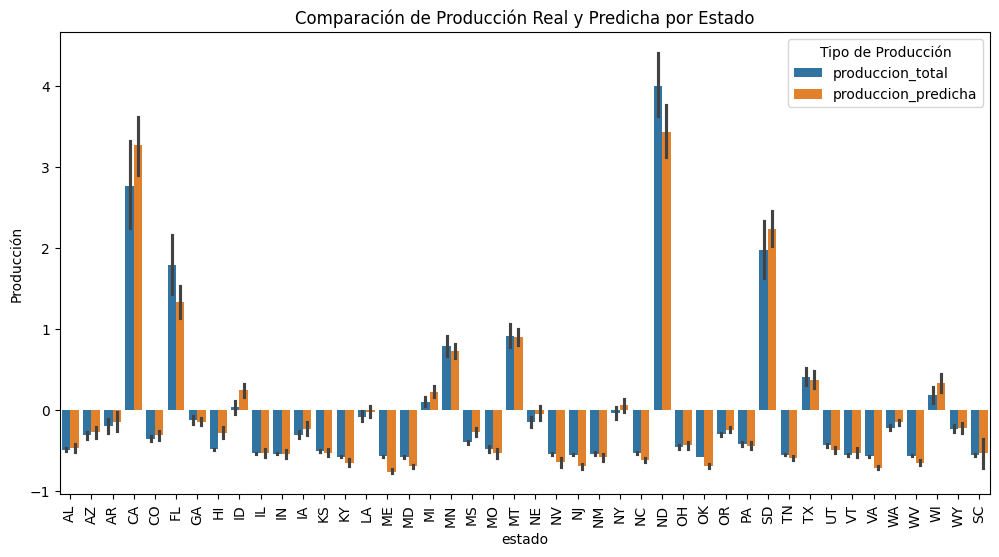

In [76]:
# Gráfico de barras: Producción real vs predicha por estado
plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars=["estado", "tipo_productor"], value_vars=["produccion_total", "produccion_predicha"],
                    var_name="Tipo de Producción", value_name="Producción")
sns.barplot(x="estado", y="Producción", hue="Tipo de Producción", data=df_melted)
plt.title('Comparación de Producción Real y Predicha por Estado')
plt.xticks(rotation=90)
plt.show()

### 3. **Eficiencias Promedio por Tipo de Productor**

Para analizar la eficiencia de cada tipo de productor, calcularemos la relación entre la producción total y el número de colmenas. Este gráfico muestra la eficiencia promedio para cada tipo de productor.

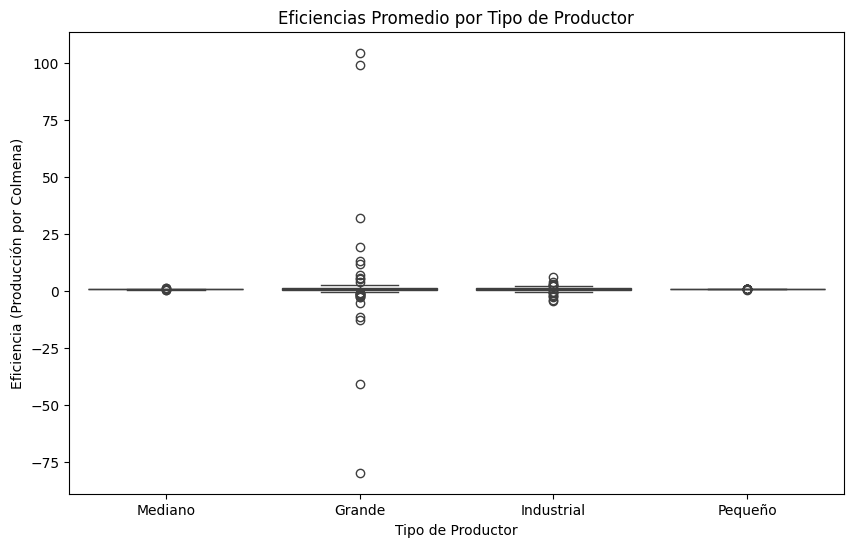

In [77]:
# Calcular eficiencia como la producción total dividida por el número de colmenas
df['eficiencia'] = df['produccion_total'] / df['num_colmenas']

# Gráfico de eficiencias promedio por tipo de productor
plt.figure(figsize=(10, 6))
sns.boxplot(x='tipo_productor', y='eficiencia', data=df)
plt.title('Eficiencias Promedio por Tipo de Productor')
plt.xlabel('Tipo de Productor')
plt.ylabel('Eficiencia (Producción por Colmena)')
plt.show()

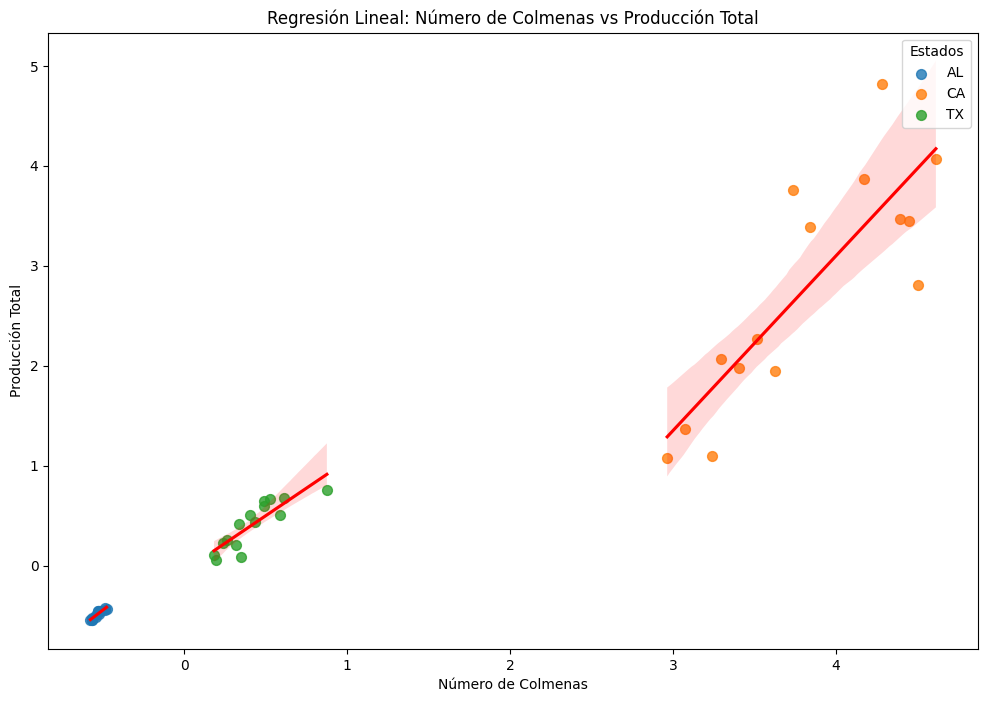

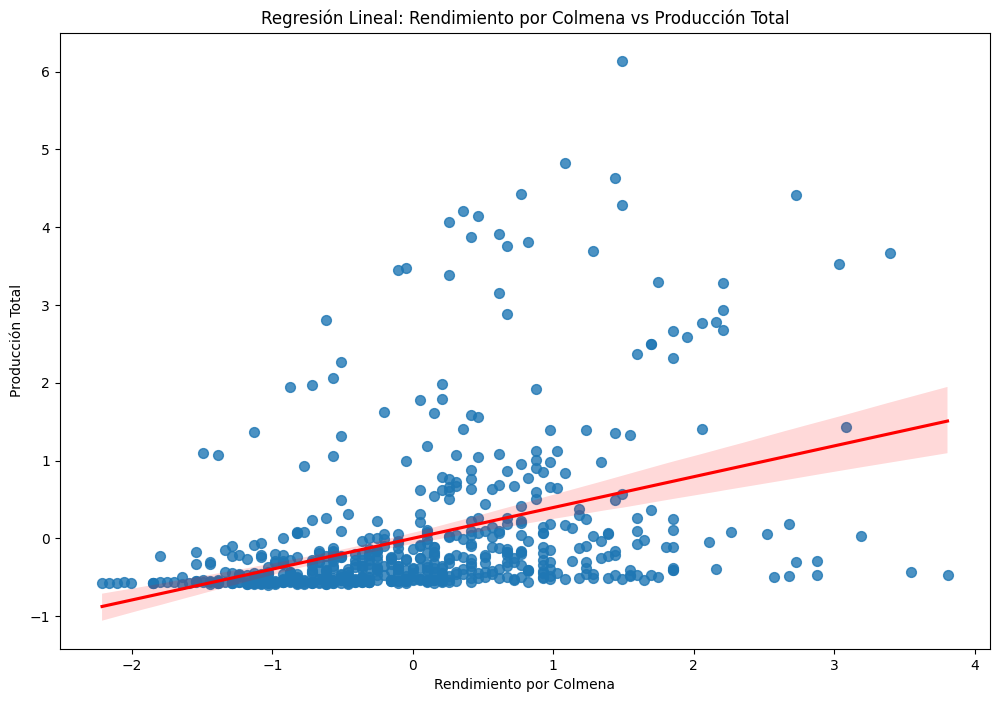

In [78]:
# Gráfico de regresión lineal con línea de tendencia para algunos estados seleccionados
selected_states = ['AL', 'CA', 'TX']

plt.figure(figsize=(12, 8))

for state in selected_states:
    state_data = df[df['estado'] == state]
    sns.regplot(x='num_colmenas', y='produccion_total', data=state_data, label=state, scatter_kws={'s': 50}, line_kws={'color': 'red'})

plt.title('Regresión Lineal: Número de Colmenas vs Producción Total')
plt.xlabel('Número de Colmenas')
plt.ylabel('Producción Total')
plt.legend(title='Estados')
plt.show()

# Gráfico de regresión lineal con línea de tendencia para la relación entre rendimiento_por_colmena y produccion_total
plt.figure(figsize=(12, 8))

sns.regplot(x='rendimiento_por_colmena', y='produccion_total', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})

plt.title('Regresión Lineal: Rendimiento por Colmena vs Producción Total')
plt.xlabel('Rendimiento por Colmena')
plt.ylabel('Producción Total')
plt.show()

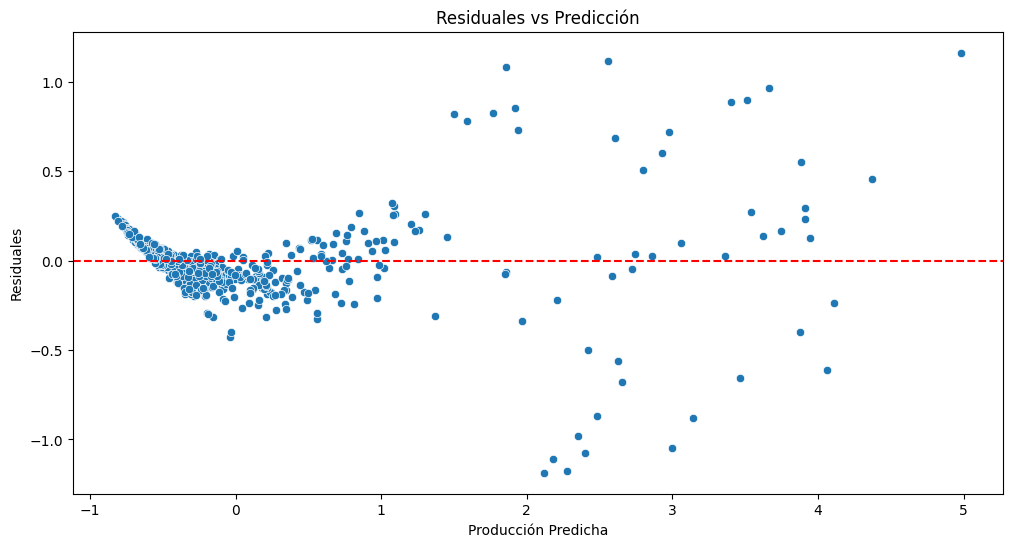

In [79]:
df['residuales'] = df['produccion_total'] - df['produccion_predicha']
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['produccion_predicha'], y=df['residuales'])
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuales vs Predicción')
plt.xlabel('Producción Predicha')
plt.ylabel('Residuales')
plt.show()


In [80]:
# Ajuste con Ridge (L2 regularization)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_scaled, y)

# Evaluar el modelo
print("R2 (Ridge):", ridge_model.score(X_scaled, y))


R2 (Ridge): 0.9513471612143855
